In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\Swastik Bhatnagar\Desktop\raw_data_unprocessed.csv')

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,0,70172,1,1,13,460,3,4,3,1,...,5,5,25,18.0,0,0,0,1,0,1
1,1,5047,1,0,25,235,3,2,3,3,...,4,1,1,6.0,0,1,0,0,1,0
2,2,110028,0,1,26,1142,2,2,2,2,...,4,5,0,0.0,1,1,0,0,1,0
3,3,24026,0,1,25,562,2,5,5,5,...,4,2,11,9.0,0,1,0,0,1,0
4,4,119299,1,1,61,214,3,3,3,3,...,3,3,0,0.0,1,1,0,0,1,0


In [4]:
# Preprocess the data
# Fill missing values with the mean for 'Arrival Delay in Minutes'
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)

In [5]:
# Drop identifier columns
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [6]:
# Split the data
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [8]:
# Set up GridSearchCV to find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [9]:
# Best estimator
best_rf = grid_search.best_estimator_

In [10]:
# Predict and evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96


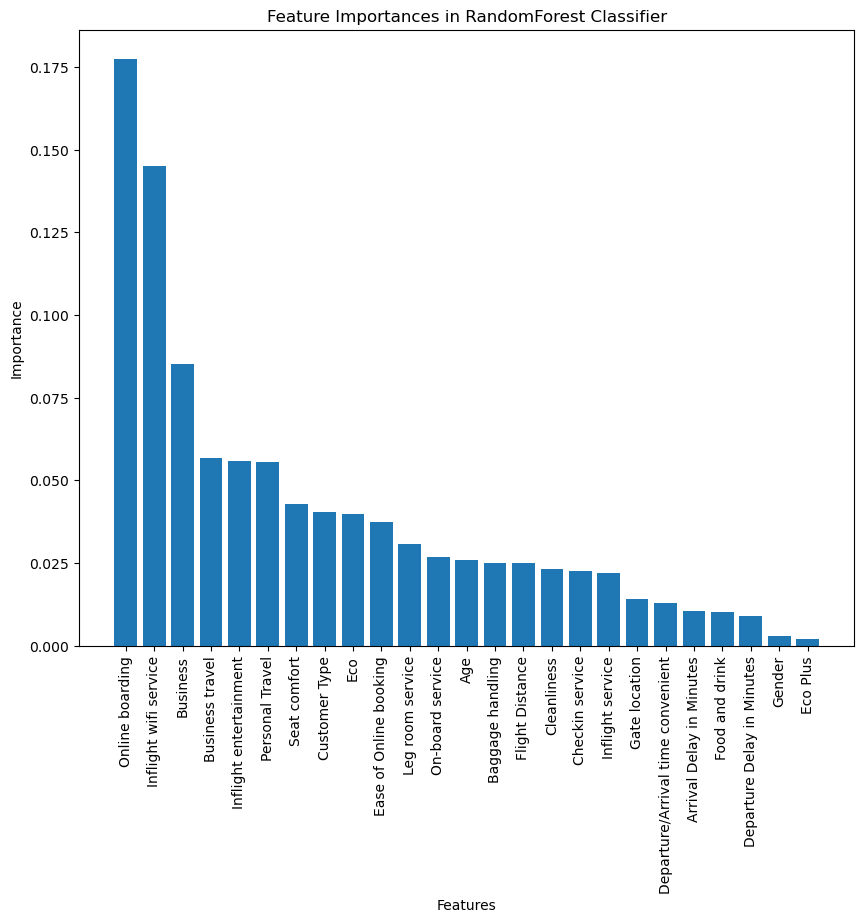

In [12]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = best_rf.feature_importances_
# Get the feature names from the dataset
feature_names = X.columns

# Sort the feature importances in descending order and plot
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 8))
plt.title('Feature Importances in RandomForest Classifier')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

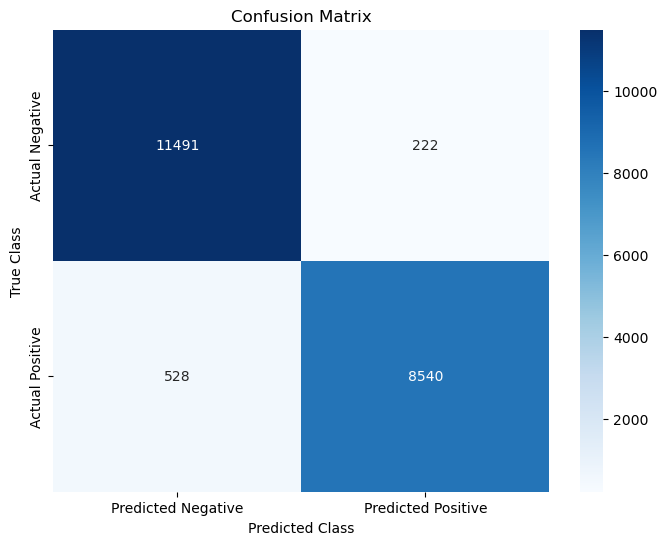

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


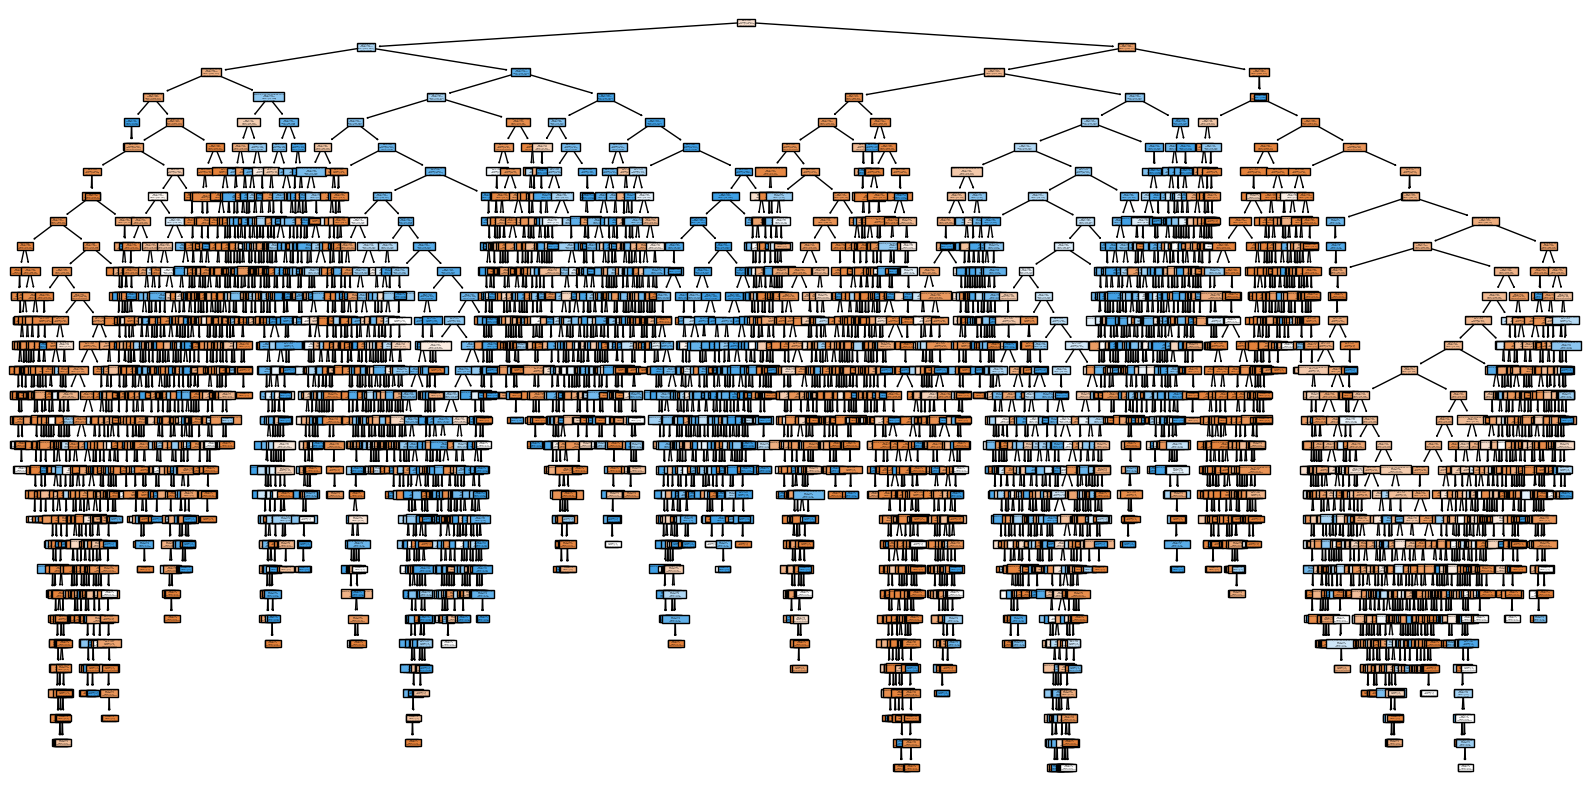

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a tree from your random forest
tree = best_rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns.tolist(),  # Convert to list here
          class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.show()

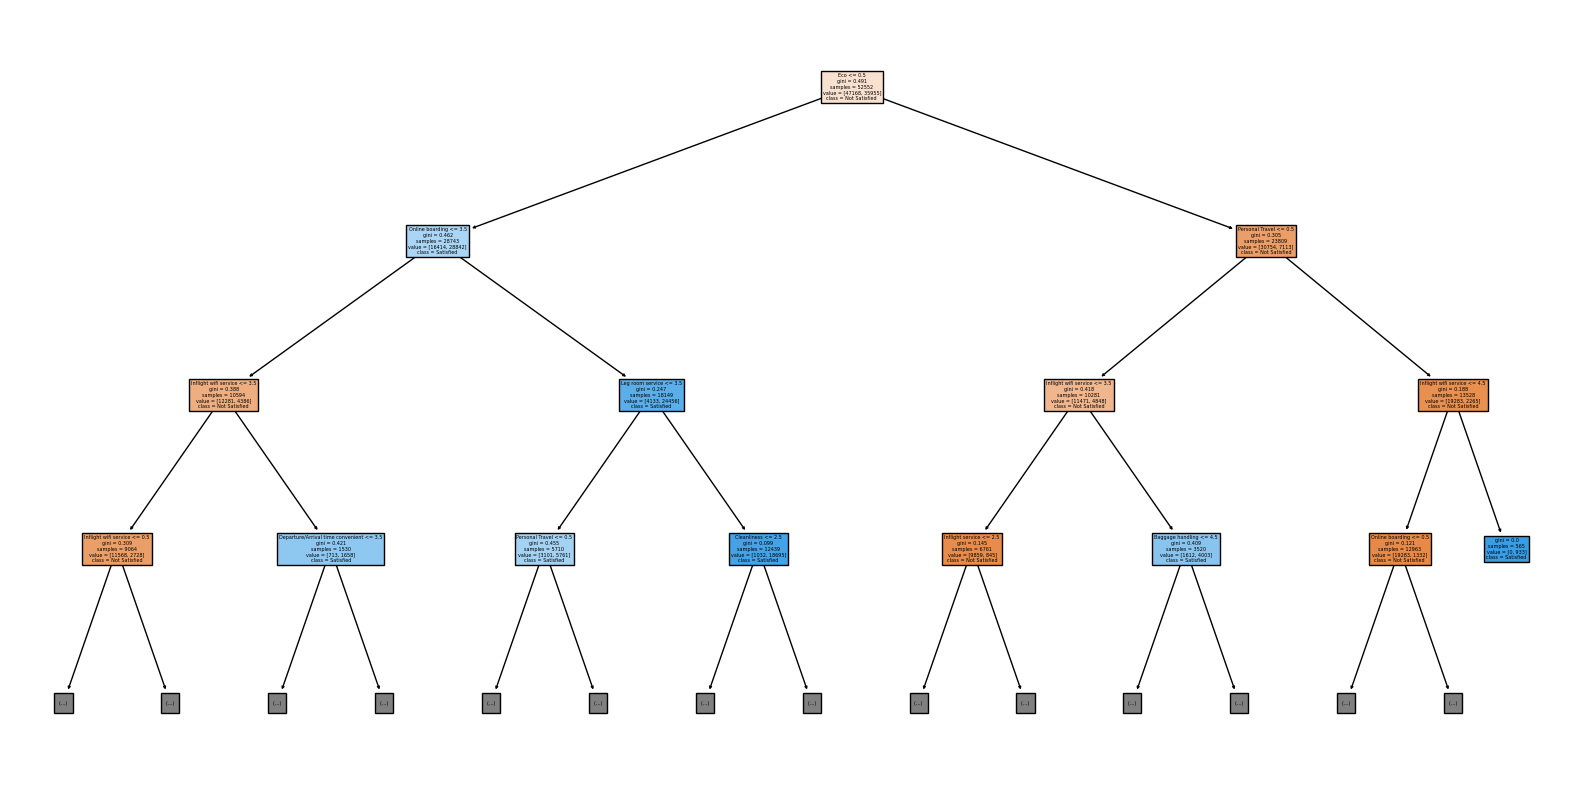

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'best_rf' is your trained RandomForest model
tree = best_rf.estimators_[0]  # Selects the first tree in the forest

# Plot the tree with limited depth
plt.figure(figsize=(20, 10))  # Set the size of the plot, which can be adjusted
plot_tree(tree, 
          feature_names=X.columns.tolist(),  # Convert feature names to list
          class_names=['Not Satisfied', 'Satisfied'],  # Specify class names
          filled=True, 
          max_depth=3)  # Limit the depth of the tree
plt.show()  # Display the plot

